In [1]:
import permutationTest as pt 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
#from utils2 import *
import time
#from significance_of_mean_cuda import significance_of_mean_cuda

### Get synthetic data

In [34]:
n_samples = 1
n = m =  500
bins =  [50, 100, 200,250,300,350,400,450,500]

In [ ]:
np.random.seed(seed)
AN, BN = [func(mean,std,setN) for i in range(sampleN)], [func(0,std,setN) for i in range(sampleN)]

In [35]:
data = lambda n,n_samples : [np.random.randint(0,n,n,dtype=np.int32) for _ in range(n_samples)]

In [36]:
def runExperiment(method_list, names_list, bins, data, n, n_samples):
    method_dict = dict()
    for method, name in zip(method_list, names_list):
        method_dict[name] = dict()
        method_dict[name]["p_values"] = list()
        method_dict[name]["time"] = list()
        for bins in s:
            np.random.seed(42)
            A = np.asarray(data(n, n_samples))
            B = np.asarray(data(n, n_samples))
        
            start = time.time()
            method_dict[name]["p_values"].append(method(A,B,bins)[0])
            end = time.time()
            method_dict[name]["time"].append(end - start)
    return method_dict
    

In [37]:
method_list = [pt.GreenFloat, pt.GreenFloatMultiThread, pt.GreenFloatCuda, pt.CoinShiftFloat]
names_list = ["GreenFloat", "GreenFloatMultiThread", "GreenFloatCuda", "CoinShiftFloat"]
method_dict = runExperiment(method_list, names_list, bins, data, n, n_samples)
    


In [38]:
np.allclose(np.asarray(method_dict["GreenFloat"]["p_values"]),
                np.asarray(method_dict["GreenFloatMultiThread"]["p_values"]),
                np.asarray(method_dict["GreenFloatCuda"]["p_values"]),
                np.asarray(method_dict["CoinShiftFloat"]["p_values"]))
             
    

True

In [39]:
def preparePandas(timeData, sampleSizes, name):
    """Create DF for sns-plots"""
    preparePd = list()
    for time, sample in zip(timeData, sampleSizes):
        preparePd.append([str(name),time, sample])
        
            
    return preparePd

In [40]:
def timePlotSNS(TimeList_list, NameList, sampleShape,binVar=False, log=False, path=None):
    """Create SNS timeseries-plot"""
    a4_dims = (11.7/1.5, 8.27/1.5)
    fig, ax = plt.subplots(figsize=a4_dims)
    

    
    sns.set(style="white")
    sns.set_context("talk")
    
    for i, (time_list, name) in enumerate(zip(TimeList_list, NameList)):
        if log:
            df = preparePandas(np.log10(time_list), sampleShape, name)
        else:
            df = preparePandas(time_list, sampleShape, name)
            
        if i ==0:
            data = df
        else:
            data += df
            
    pdData = pd.DataFrame(data, columns=['Method', 'time(s)','bins'])
    

    if log:        
        MAX = max(pdData["time(s)"])
        MIN = min(pdData["time(s)"])

        RANGE = np.arange(np.floor(MIN), np.ceil(MAX))
        snsPlot = sns.lineplot(x="bins", y="time(s)",
             hue="Method",
             data=pdData)#.set(yticks = RANGE, yticklabels=10**RANGE)
        plt.yticks(RANGE, 10.0**RANGE)
        
        
    else:
        snsPlot = sns.lineplot(x="bins", y="time(s)",
             hue="Method",
             data=pdData,)
    
    if binVar:
        plt.xlabel(r"$n$", fontsize=20)
        
    else:
        plt.xlabel(r"$n_{w}$", fontsize=20)
    
    plt.ylabel(r"$time(s)$", fontsize=20)
    
    
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:])
    
    plt.setp(snsPlot.get_legend().get_texts(), fontsize=20)
    plt.xticks(size = 20)
    plt.yticks(size = 20)
    plt.tight_layout()
    
    
    
    if path:   
        fig = snsPlot.get_figure()
        fig.savefig(path)

In [41]:
TimeList_list = [method_dict["GreenFloat"]["time"], 
                 method_dict["GreenFloatMultiThread"]["time"],
                 method_dict["GreenFloatCuda"]["time"],
                 method_dict["CoinShiftFloat"]["time"]]
NameList = ["Green", "Green Multithreading", "Green Cuda", "Coin Shift"]

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

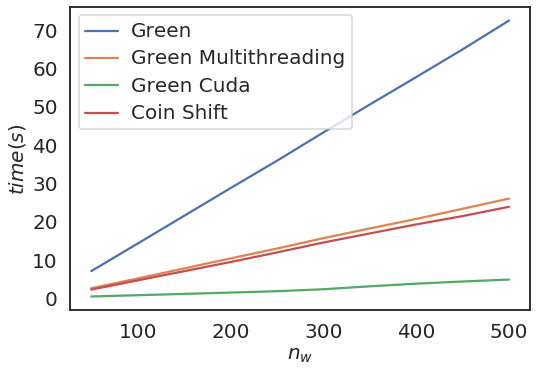

In [43]:
timePlotSNS(TimeList_list, NameList, s,binVar=False, log=False, path="./figures/experiemnt1/TimeVsbins_linear")


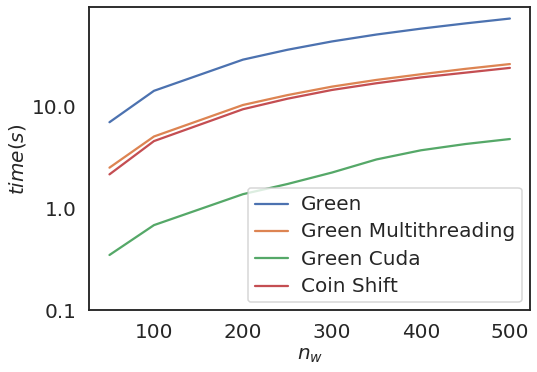

In [44]:
timePlotSNS(TimeList_list, NameList, s, log=True, path="./figures/experiemnt1/TimeVsbins_log")